# Reverend Thomas Bayes

                                             -------and probabilistic programming-------

Questioning what appeared to be evidence or tests about evidence was entrenched in Thomas Bayes belief system. His beliefs were not absolute and evidence was summoned once again to test the strength of those beliefs. I have to admit, this is a head scratching exercise. While it makes sense on a higher level, when we get into the nuts and bolts, it completely changes how we look at things.

Bayes rule computes the actual probability of an event given some information about the tests related to that event. Bayes rule takes the test result and calculates the real probability that the test has identified the event.

All said and done, this joke has a lot more meat than meets the eye:


 *A Bayesian is one who vaguely expecting a horse and catching a glimpse of a donkey, they strongly believe they've seen a mule*

In [3]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
from scipy import stats
import pymc3 as pm
import matplotlib.pyplot as plt
import arviz as az
plt.style.use('ggplot')

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Ler's consider a few data points pulled from a gaussian distribution of mean=30 and sigma = 2

# Small sample size

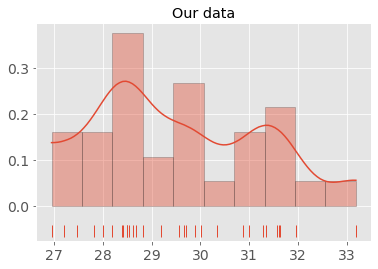

Mean: 29.564331635527534
STD: 1.5764357916701213


In [21]:


sample_size = 30

# define gaussian data
gauss = stats.norm.rvs(size = sample_size, loc = 30, scale = 2)

# plot data
plt.hist(gauss, alpha=.4, density=True, edgecolor = 'k', bins = 10)
az.plot_kde(gauss, rug = True)
plt.title('Our data')
plt.show()

print('Mean:',gauss.mean())
print('STD:', gauss.std())

Let's see how sampling from this distribution with a weak informative prior shapes the posterior. Weak informative prior is meant as prior beliefs that are simply guesses. We say that mu is anywhere between 0 to 100 and we say that sigma is 10. Let's see what introducing evidence from our data does to our beliefs (the posterior):

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$\sigma$, $\mu$]
Sampling 4 chains, 0 divergences: 100%|████████████████████████████████████████| 8000/8000 [00:25<00:00, 313.24draws/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B139FD4048>,
      dtype=object)

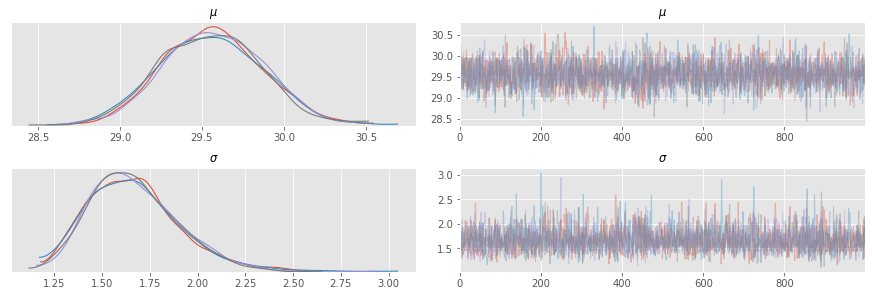

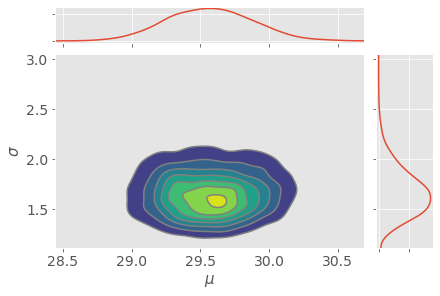

In [22]:
# extract information from the data using the asumtions
with pm.Model() as model_g:
    mu = pm.Uniform(r'$\mu$', lower = 0, upper = 100) # prior
    sigma = pm.HalfNormal(r'$\sigma$', sd=10) # likelihood
    y = pm.Normal('y', mu = mu, sd = sigma, observed = gauss)
    trace_g = pm.sample(1000, tune = 1000)
az.plot_trace(trace_g)
az.plot_joint(trace_g, kind='kde', fill_last=False)

It's almost like magic: sigma ended around 1.5 and mu around 30. Let's check the summary for additional confirmation:

In [23]:
az.summary(trace_g)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
$\mu$,29.563,0.309,28.985,30.124,0.006,0.004,2867.0,2861.0,2884.0,2326.0,1.0
$\sigma$,1.670,0.235,1.261,2.096,0.004,0.003,3119.0,3017.0,3205.0,2478.0,1.0


Now let's visualize what uncertainty in mu and sigma means. Instead of having one nice pdf curve we're looking at a whole family of curves:

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1071.94it/s]
arviz.data.io_pymc3 - WARNING - posterior predictive shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


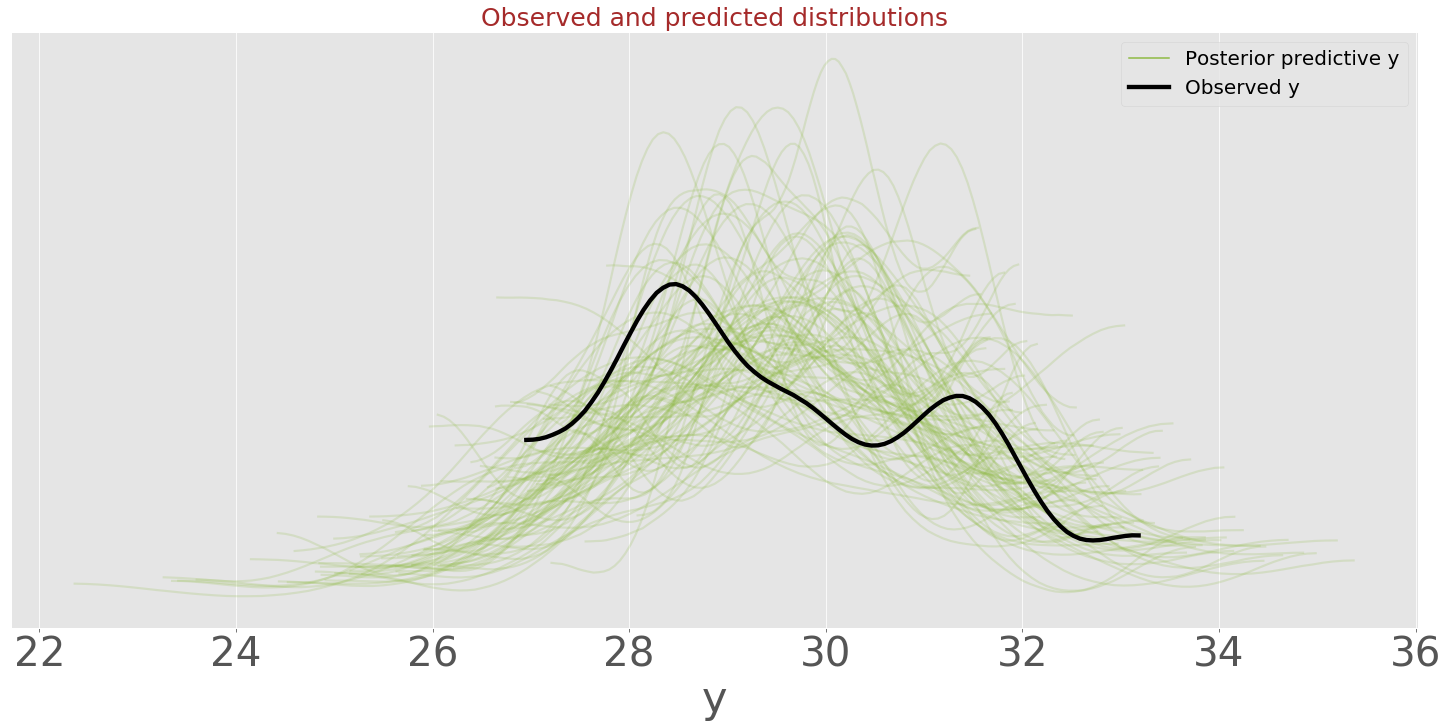

In [24]:
import warnings
warnings.simplefilter('ignore')

y_pred_g = pm.sample_posterior_predictive(trace_g,100, model_g)
data_ppc = az.from_pymc3(trace=trace_g, posterior_predictive=y_pred_g)
ax = az.plot_ppc(data_ppc, figsize=(20,10), mean=False)
plt.title('Observed and predicted distributions', fontsize=25, color='brown')#, weight='bold')
ax[0].legend(fontsize=20)

The uncertainty is due to the small sample size. Let's increase the sample size and see what happens

# Larger sample size

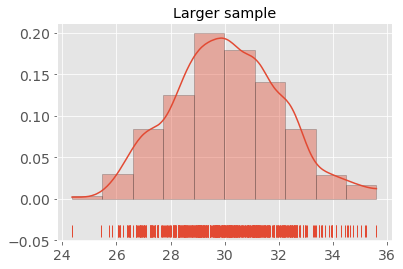

Mean: 30.042961629810605
STD: 1.9669538232589765


In [27]:
sample_size = 500

# define gaussian data
gauss2 = stats.norm.rvs(size = sample_size, loc = 30, scale = 2)

# plot data
plt.hist(gauss2, alpha=.4, density=True, edgecolor = 'k', bins = 10)
az.plot_kde(gauss2, rug = True)
plt.title('Larger sample')
plt.show()

print('Mean:',gauss2.mean())
print('STD:', gauss2.std())

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$\sigma$, $\mu$]
Sampling 4 chains, 0 divergences: 100%|█████████████████████████████████████████| 8000/8000 [03:47<00:00, 35.23draws/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B13E8613C8>,
      dtype=object)

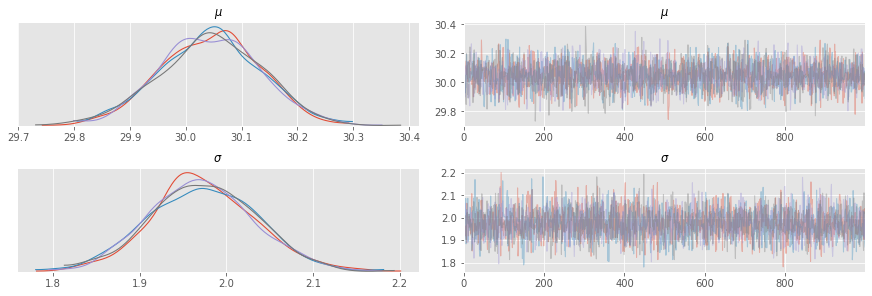

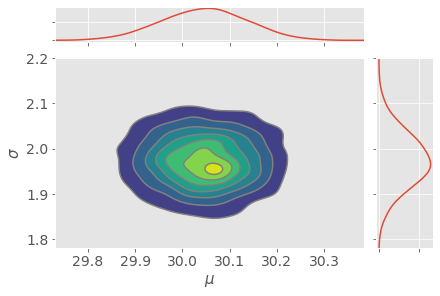

In [28]:
# extract information from the data using the asumtions
with pm.Model() as model_g:
    mu = pm.Uniform(r'$\mu$', lower = 0, upper = 100) # prior
    sigma = pm.HalfNormal(r'$\sigma$', sd=10) # likelihood
    y = pm.Normal('y', mu = mu, sd = sigma, observed = gauss2)
    trace_g = pm.sample(1000, tune = 1000)
az.plot_trace(trace_g)
az.plot_joint(trace_g, kind='kde', fill_last=False)

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1146.77it/s]
arviz.data.io_pymc3 - WARNING - posterior predictive shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


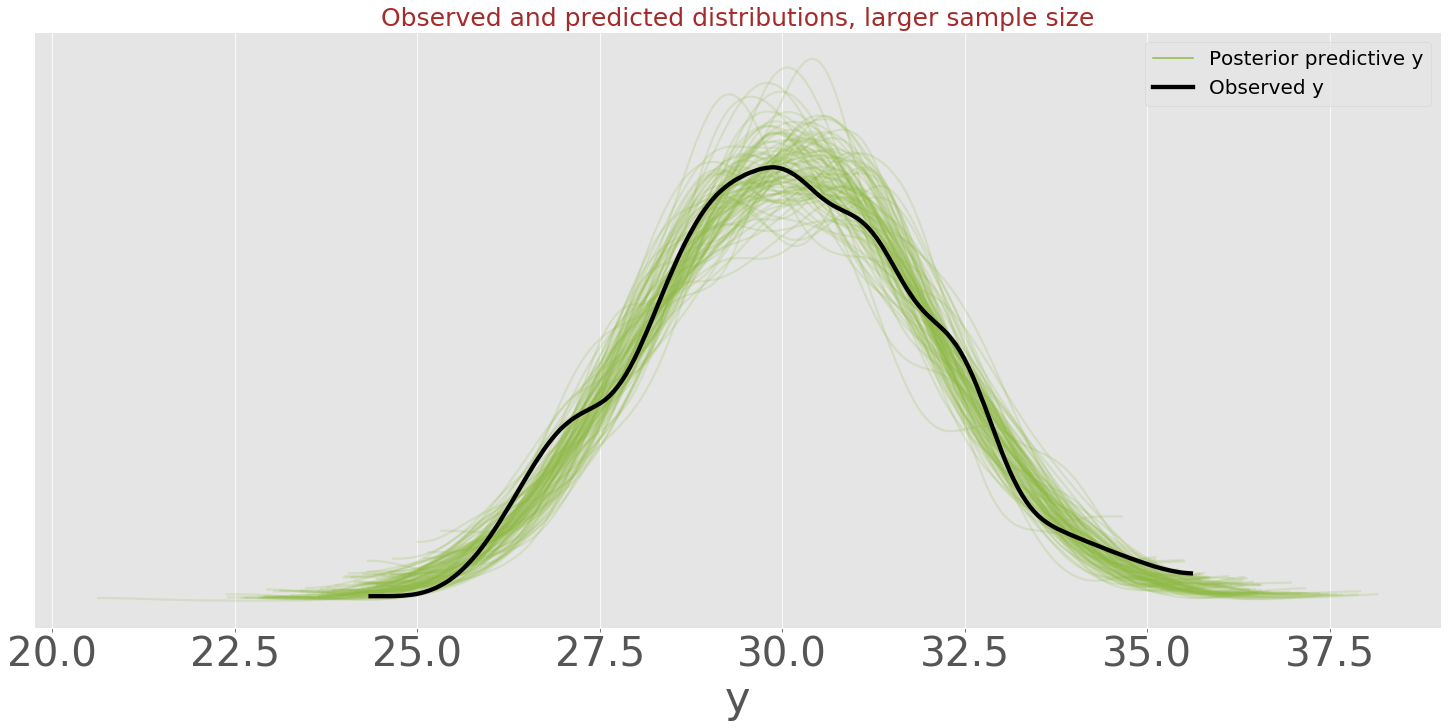

In [29]:
import warnings
warnings.simplefilter('ignore')

y_pred_g = pm.sample_posterior_predictive(trace_g,100, model_g)
data_ppc = az.from_pymc3(trace=trace_g, posterior_predictive=y_pred_g)
ax = az.plot_ppc(data_ppc, figsize=(20,10), mean=False)
plt.title('Observed and predicted distributions, larger sample size', fontsize=25, color='brown')#, weight='bold')
ax[0].legend(fontsize=20)

In [ ]:
With a larger sample size, the posterior distributions were snuggly grouped around the true sample values.

# Skewed data

Let's now try with skewed data

## Small sample size

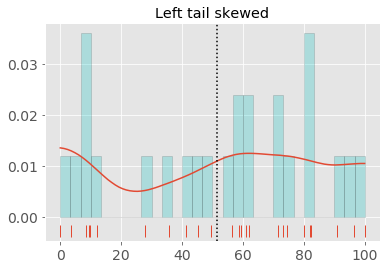

Mean: 51.630352042933325
STD: 30.48543424515377


In [5]:
# define skewed data
numValues = 25
maxVal = 100

# LEFT SKEWED
a =  - 10   #Negative values are left skewed, positive values are right skewed.

skewed = stats.skewnorm.rvs(a = a,loc=maxVal, size=numValues)  #Skewnorm function
#print(max(skewed))
skewed=skewed - min(skewed) #Shift the set so the minimum value is equal to zero.
#print(max(skewed))      
skewed = skewed / max(skewed)      #Standadize all the vlues between 0 and 1. 
#print(max(skewed))
skewed = skewed * maxVal         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(skewed,30,density=True, color = 'c', alpha=0.25, edgecolor='k', label='right skewed')

az.plot_kde(skewed, rug = True)
plt.axvline(skewed.mean(), linestyle = ':', color = 'k')
plt.title('Left tail skewed')
plt.show()

print('Mean:',skewed.mean())
print('STD:', skewed.std())


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$\sigma$, $\mu$]
Sampling 4 chains, 0 divergences: 100%|████████████████████████████████████████| 8000/8000 [00:21<00:00, 379.61draws/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000270891D8388>,
      dtype=object)

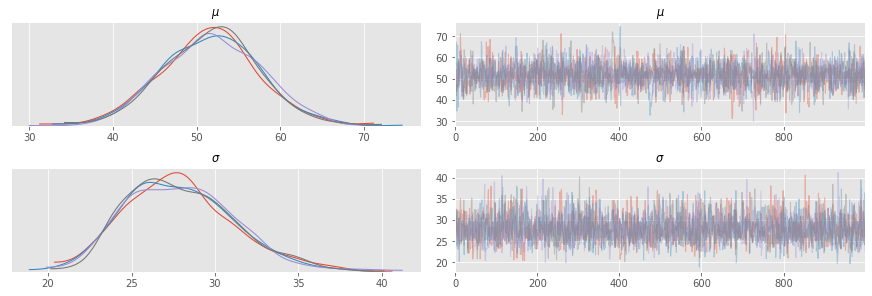

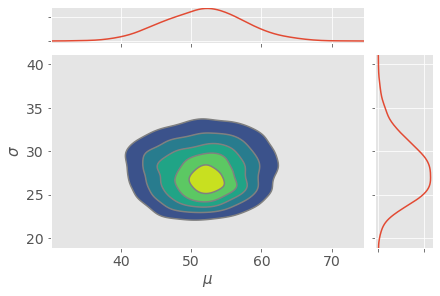

In [6]:
# extract informtion from the data using the asumtions
with pm.Model() as model_g:
    mu = pm.Uniform(r'$\mu$', lower = 0, upper = 100) # prior
    sigma = pm.HalfNormal(r'$\sigma$', sd=10) # likelihood
    y = pm.Normal('y', mu = mu, sd = sigma, observed = skewed)
    trace_g = pm.sample(1000, tune = 1000)
az.plot_trace(trace_g)
az.plot_joint(trace_g, kind='kde', fill_last=False)

Text(0.5, 1.0, '$\\sigma$')

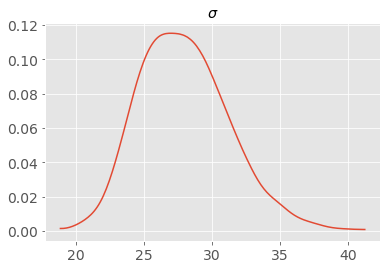

In [7]:
# if you want to get access to the values for any of the parameters stored in a trace object, 
# index the trace with the name of the parameter in question

trace_g[r'$\sigma$']
az.plot_kde(trace_g[r'$\sigma$'])
plt.title(r'$\sigma$')

Text(0.5, 1.0, '$\\mu$')

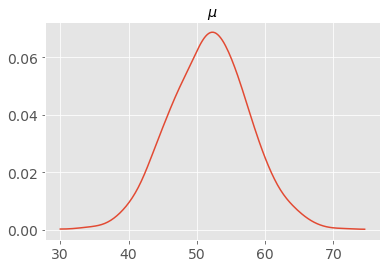

In [8]:
az.plot_kde(trace_g[r'$\mu$'])
plt.title(r'$\mu$')

In [9]:
az.summary(trace_g)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
$\mu$,51.723,5.779,41.373,63.196,0.103,0.073,3127.0,3127.0,3133.0,2602.0,1.0
$\sigma$,27.925,3.262,22.210,34.148,0.057,0.041,3283.0,3201.0,3216.0,2526.0,1.0


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1067.20it/s]
arviz.data.io_pymc3 - WARNING - posterior predictive shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


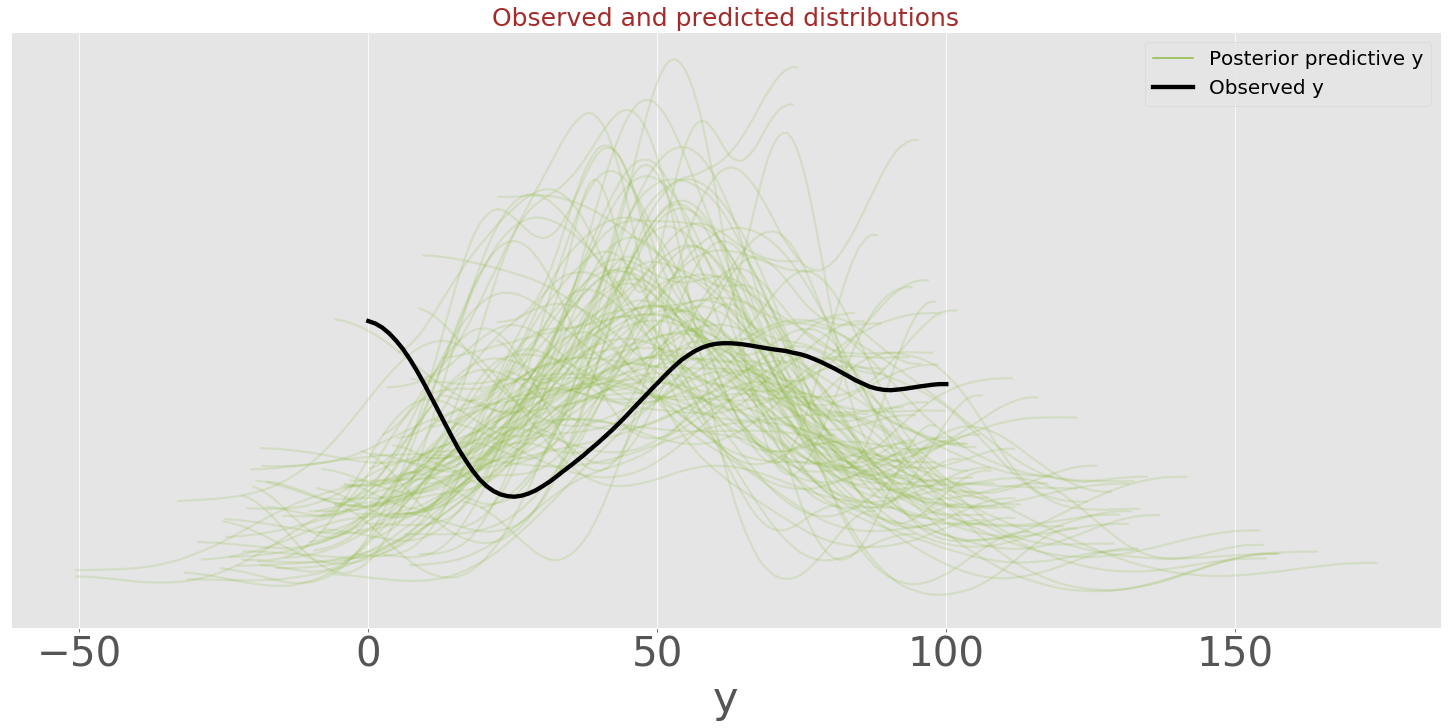

In [10]:
import warnings
warnings.simplefilter('ignore')

y_pred_g = pm.sample_posterior_predictive(trace_g,100, model_g)
data_ppc = az.from_pymc3(trace=trace_g, posterior_predictive=y_pred_g)
ax = az.plot_ppc(data_ppc, figsize=(20,10), mean=False)
plt.title('Observed and predicted distributions', fontsize=25, color='brown')#, weight='bold')
ax[0].legend(fontsize=20)

## Larger sample size

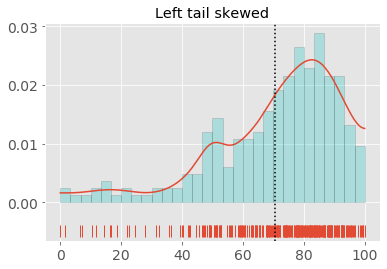

Mean: 70.58218583717748
STD: 20.68959228332266


In [12]:
# define skewed data
numValues = 250
maxVal = 100

# LEFT SKEWED
a =  - 10   #Negative values are left skewed, positive values are right skewed.

skewed = stats.skewnorm.rvs(a = a,loc=maxVal, size=numValues)  #Skewnorm function
#print(max(skewed))
skewed=skewed - min(skewed) #Shift the set so the minimum value is equal to zero.
#print(max(skewed))      
skewed = skewed / max(skewed)      #Standadize all the vlues between 0 and 1. 
#print(max(skewed))
skewed = skewed * maxVal         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(skewed,30,density=True, color = 'c', alpha=0.25, edgecolor='k', label='right skewed')

az.plot_kde(skewed, rug = True)
plt.axvline(skewed.mean(), linestyle = ':', color = 'k')
plt.title('Left tail skewed')
plt.show()

print('Mean:',skewed.mean())
print('STD:', skewed.std())


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$\sigma$, $\mu$]
Sampling 4 chains, 0 divergences: 100%|█████████████████████████████████████████| 8000/8000 [01:36<00:00, 82.60draws/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002708AE2E308>,
      dtype=object)

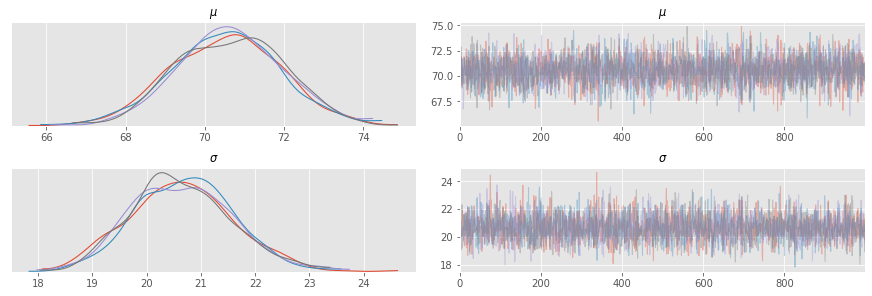

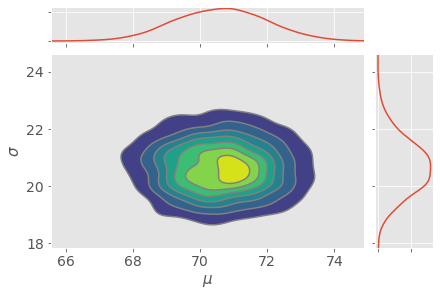

In [13]:
# extract informtion from the data using the asumtions
with pm.Model() as model_g:
    mu = pm.Uniform(r'$\mu$', lower = 0, upper = 100) # prior
    sigma = pm.HalfNormal(r'$\sigma$', sd=10) # likelihood
    y = pm.Normal('y', mu = mu, sd = sigma, observed = skewed)
    trace_g = pm.sample(1000, tune = 1000)
az.plot_trace(trace_g)
az.plot_joint(trace_g, kind='kde', fill_last=False)

In [14]:
az.summary(trace_g)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
$\mu$,70.593,1.350,68.199,73.246,0.024,0.017,3258.0,3249.0,3252.0,2805.0,1.0
$\sigma$,20.662,0.927,18.953,22.397,0.015,0.011,3795.0,3781.0,3805.0,2256.0,1.0


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1329.23it/s]
arviz.data.io_pymc3 - WARNING - posterior predictive shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


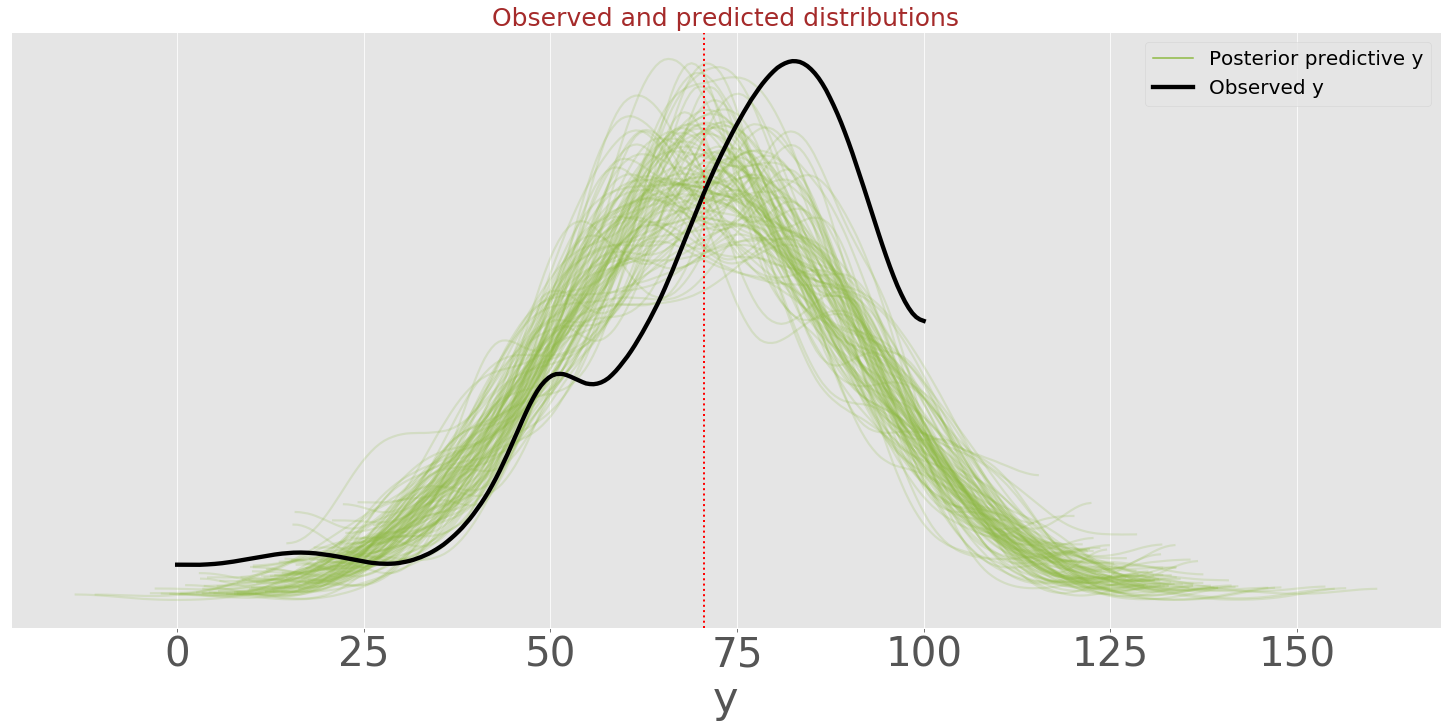

In [18]:
import warnings
warnings.simplefilter('ignore')

y_pred_g = pm.sample_posterior_predictive(trace_g,100, model_g)
data_ppc = az.from_pymc3(trace=trace_g, posterior_predictive=y_pred_g)
ax = az.plot_ppc(data_ppc, figsize=(20,10), mean=False)
plt.axvline(skewed.mean(), linestyle = ':', color = 'r', lw=2)
plt.title('Observed and predicted distributions', fontsize=25, color='brown')#, weight='bold')
ax[0].legend(fontsize=20)

Here it becomes obvious that our vague expectation of seeing a horse changes the donkey into a mule

# Bernoulli trial with an unfair coin

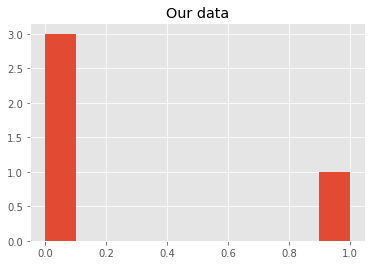

In [43]:
from scipy.stats import bernoulli

# initiallize the random seed generator
np.random.seed(123)

# define the data
trials=4
theta_real = .31
ber = bernoulli.rvs(p=theta_real, size = trials)

# visualize data
plt.hist(ber)
plt.title('Our data')
plt.show()



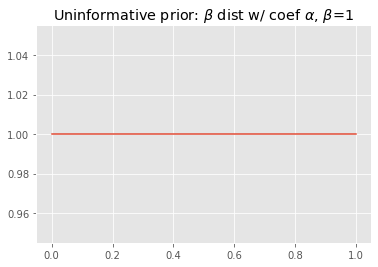

In [44]:
# visualize beta distrib with coeficients = 1
from scipy.stats import beta
x = np.linspace(0,1,100)
y = beta(1,1).pdf(x)
plt.title('Uninformative prior:'+ r' $\beta$ dist w/ coef'+ r' $\alpha$,'+r' $\beta$=1')
plt.plot(x,y)

We're basically saying we believe the coin is fair --> the probability is uniform

Let's now challenge our beliefs with the evidence from data

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$\theta$ < [0.45 - 0.55] - the coin IS NOT FAIR]
Sampling 4 chains, 0 divergences: 100%|███████████████████████████████████████| 6800/6800 [00:05<00:00, 1198.96draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$\theta$ < [0.45 - 0.55] - the coin IS NOT FAIR]
Sampling 4 chains, 0 divergences: 100%|███████████████████████████████████████| 4000/4000 [00:03<00:00, 1046.63draws/s]


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
$\theta$ < [0.45 - 0.55] - the coin IS NOT FAIR,0.33,0.176,0.019,0.634,0.004,0.003,1751.0,1751.0,1669.0,2298.0,1.0


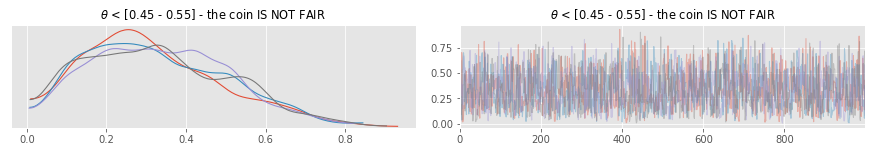

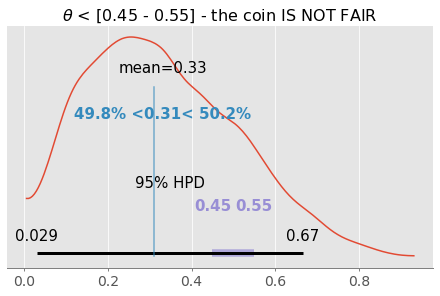

In [45]:
import warnings
warnings.simplefilter('ignore')

# model with the data
with pm.Model() as our_first_model:
    # this is the prior: a beta distribution with coeficients = 1 - a uniform distribution
    theta = pm.Beta( r'$\theta$' ' < [0.45 - 0.55] - the coin IS NOT FAIR', alpha=1., beta =1.)
    # this is the likelihood
    y = pm.Bernoulli('y', p = theta, observed = ber)
    # this is the posterior
    trace = pm.sample(1000, random_seed=123, tune = 700)
    pm.sample()

import arviz as az
az.plot_trace(trace)

az.plot_posterior(trace, credible_interval=.95, rope =[.45,.55], ref_val = theta_real)
az.summary(trace)